> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# Homework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Catch_Motion.md)

1. Instead of using $\frac{\Delta v}{\Delta t}$, you can use the [numpy polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to determine the acceleration of the ball. 

    a. Use your coordinates from the saved .npz file you used above to load your projectile motion data
    
    ```python
    npz_coords = np.load('projectile_coords.npz')
    t = npz_coords['t']
    x = npz_coords['x']
    y = npz_coords['y']
    ```
    
    b. Calculate $v_x$ and $v_y$ using a finite difference again, then do a first-order polyfit to $v_x-$ and $v_y-$ vs $t$. What is the acceleration now?
    
    c. Now, use a second-order polynomial fit for x- and y- vs t. What is acceleration now?
    
    d. Plot the polyfit lines for velocity and position (2 figures) with the finite difference velocity data points and positions. Which lines look like better e.g. which line fits the data?

In [2]:
#Part a, loading projectile motion data

npz_coords = np.load('../data/projectile_coords.npz')
t = npz_coords['t']
x = npz_coords['x']
y = npz_coords['y']

In [3]:
#Part b, calculating v_x and v_y with first order polyfit

vx = np.gradient(x, t)
vy = np.gradient(y, t)

# Perform a first-order polynomial fit to the velocity data
coeffs_vx = np.polyfit(t, vx, 1)
coeffs_vy = np.polyfit(t, vy, 1)

print("Accel x: ",coeffs_vx[0])
print("Accel y: ",coeffs_vy[0])

Accel x:  -0.18222554144884315
Accel y:  -10.210604929051529


In [4]:
#Part c, calculating v_x and v_y with second order polyfit

coeffs_ax = np.polyfit(t, x, 2)
coeffs_ay = np.polyfit(t, y, 2)

# The acceleration is given by twice the coefficient of the t^2 term (the quadratic coefficient)
ax = 2 * coeffs_ax[0]
ay = 2 * coeffs_ay[0]

print("Accel x: ",ax)
print("Accel y: ",ay)

Accel x:  -0.14083004374265978
Accel y:  -10.222980902592553


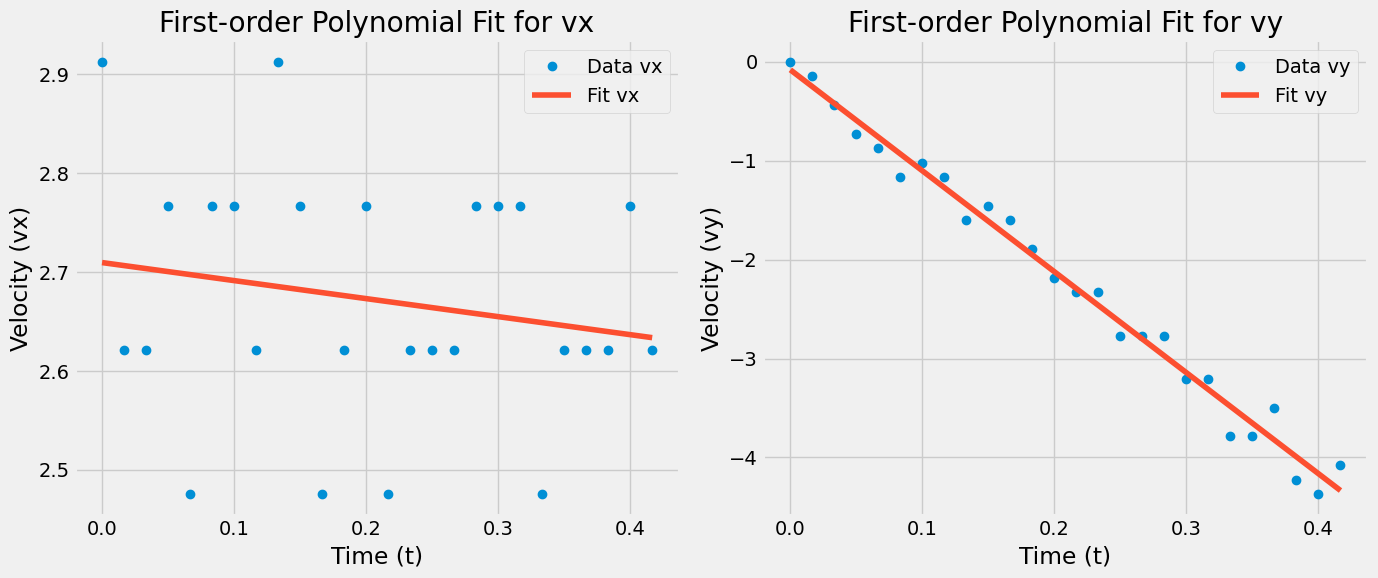

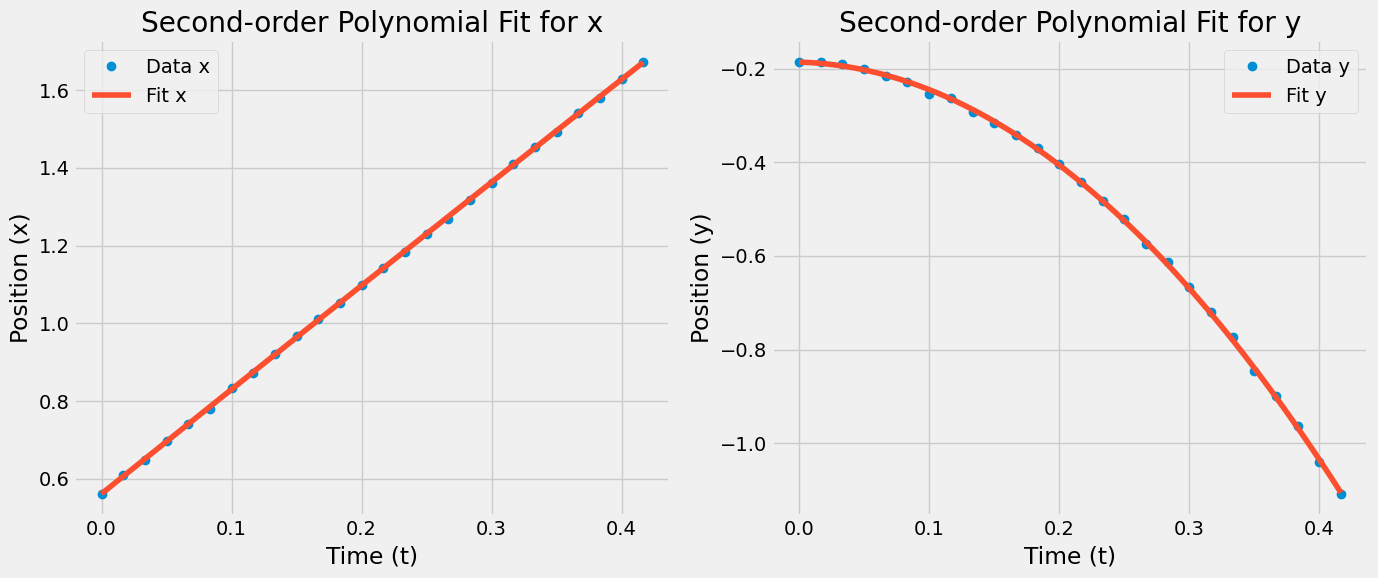

'The first-order ploynomial for v_y and both the second order polynomial fits fit the data points well.'

In [5]:
t_fit = np.linspace(t.min(), t.max(), 100)
vx_fit = np.polyval(coeffs_vx, t_fit)
vy_fit = np.polyval(coeffs_vy, t_fit)

# Plot for velocity
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, vx, 'o', label='Data vx')
plt.plot(t_fit, vx_fit, '-', label='Fit vx')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (vx)')
plt.title('First-order Polynomial Fit for vx')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, vy, 'o', label='Data vy')
plt.plot(t_fit, vy_fit, '-', label='Fit vy')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (vy)')
plt.title('First-order Polynomial Fit for vy')
plt.legend()

plt.tight_layout()
plt.show()

# For position (Second-order fit)
x_fit = np.polyval(coeffs_ax, t_fit)
y_fit = np.polyval(coeffs_ay, t_fit)

# Plot for position
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, x, 'o', label='Data x')
plt.plot(t_fit, x_fit, '-', label='Fit x')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Second-order Polynomial Fit for x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, y, 'o', label='Data y')
plt.plot(t_fit, y_fit, '-', label='Fit y')
plt.xlabel('Time (t)')
plt.ylabel('Position (y)')
plt.title('Second-order Polynomial Fit for y')
plt.legend()

plt.tight_layout()
plt.show()

'''The first-order ploynomial for v_y and both the second order polynomial fits fit the data points well.'''

2. Not only can you measure acceleration of objects that you track, you can look at other physical constants like [coefficient of restitution](https://en.wikipedia.org/wiki/Coefficient_of_restitution), $e$ . 

     During a collision with the ground, the coefficient of restitution is
     
     $e = -\frac{v_{y}'}{v_{y}}$ . 
     
     Where $v_y'$ is y-velocity perpendicular to the ground after impact
     and $v_y$ is the y-velocity before impact. 
     
     a. Calculate $v_y$ and plot as a function of time from the data `'../data/fallingtennisball02.txt'`
     
     b. Find the locations when $v_y$ changes rapidly i.e. the impact locations. Get the maximum and minimum velocities closest to the impact location. _Hint: this can be a little tricky. Try slicing the data to include one collision at a time before using  the `np.min` and `np.max` commands._
     
     c. Calculate the $e$ for each of the three collisions

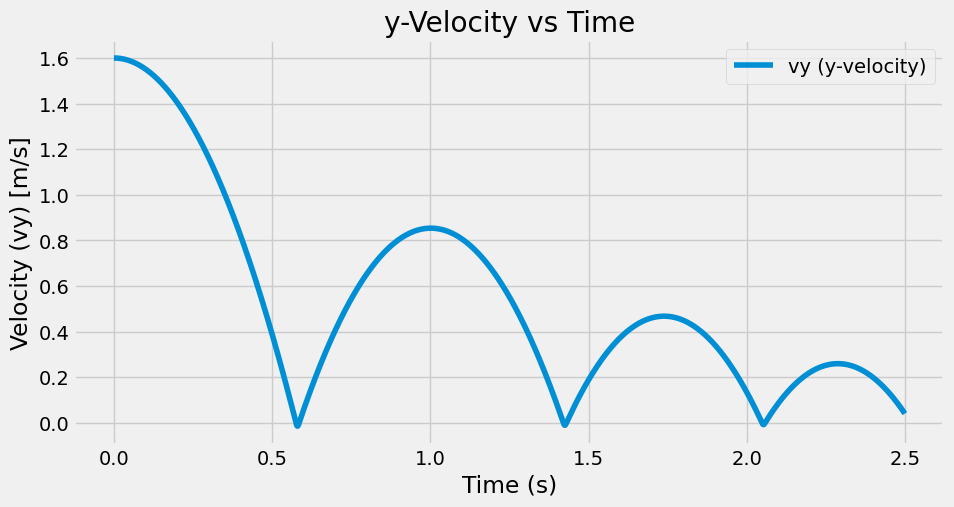

In [6]:
#Part a

data = np.loadtxt('../data/fallingtennisball02.txt')

t_data = data[:, 0]
vy_data = data[:, 1]

#Plot as a function of time
plt.figure(figsize=(10, 5))
plt.plot(t_data, vy_data, label='vy (y-velocity)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (vy) [m/s]')
plt.title('y-Velocity vs Time')
plt.legend()
plt.show()

In [7]:
#Part b

grad_vy = np.gradient(vy_data, t_data)

#Define a threshold to identify significant changes
threshold = np.max(np.abs(grad_vy)) * 0.5

#Find indices where the change is above the threshold
impact_indices = np.where(np.abs(grad_vy) > threshold)[0]

#Now we slice the data around these impact indices to find the min and max velocities around the impacts
#We use a window size to look around each impact point, this might need adjusting
window_size = 5
e_values = []

for index in impact_indices:
    #Make sure we don't go out of bounds
    start = max(index - window_size, 0)
    end = min(index + window_size, len(vy_data))
    
    #Slice the data to include only one collision at a time
    slice_vy = vy_data[start:end]
    
    #Get the maximum and minimum velocities closest to the impact location
    vy_after = np.min(slice_vy)  # After impact (going upwards so minimum value)
    vy_before = np.max(slice_vy)  # Before impact (coming downwards so maximum value)
    
print("Min: ",vy_after)
print("Max: ",vy_before)
    

Min:  -0.008310771625688282
Max:  0.01369118622833752


In [8]:
#Part c
#Similar process to part b

for index in impact_indices:
    start = max(index - window_size, 0)
    end = min(index + window_size, len(vy_data))
    
    slice_vy = vy_data[start:end]
    
    vy_after = np.min(slice_vy) 
    vy_before = np.max(slice_vy)
    
    #Calculate the coefficient of restitution for each collision
    e = -vy_after / vy_before
    e_values.append(e)
    

#Get first three collision values
e_values = e_values[:3]
print("e values for three collisions: ",e_values)

e values for three collisions:  [-0.9798619224416076, -0.9797466070709724, -0.9796306295428018]


## Problems [Part 2](./02_Step_Future.md)

1. Integrate the `fall_drag` equations for a tennis ball and a [lacrosse ball](https://en.wikipedia.org/wiki/Lacrosse_ball) with the same initial conditions as above. Plot the resulting height vs time. 

_Given:_ y(0) = 1.6 m, v(0) = 0 m/s

|ball| diameter | mass|
|---|---|---|
|tennis| $6.54$–$6.86 \rm{cm}$ |$56.0$–$59.4 \rm{g}$|
|lacrosse| $6.27$–$6.47 \rm{cm}$ |$140$–$147 \rm{g}$|

Is there a difference in the two solutions? At what times do the tennis ball and lacrosse balls reach the ground? Which was first?

In [9]:
g = 9.81 
rho = 1.225 
C_d = 0.47  
dt = 0.001  
t_max = 5  

#Given diameters and masses for the tennis and lacrosse balls
d_tennis = (6.54 + 6.86) / 2 / 100  # converting cm to m
m_tennis = 59.4 / 1000  # converting g to kg
A_tennis = np.pi * (d_tennis / 2)**2  # cross-sectional area

d_lacrosse = (6.27 + 6.47) / 2 / 100  # converting cm to m
m_lacrosse = (140 + 147) / 2 / 1000  # converting g to kg
A_lacrosse = np.pi * (d_lacrosse / 2)**2  # cross-sectional area

#Function to calculate the drag force
def drag_force(v, A):
    return 0.5 * rho * C_d * A * v**2

#Euler's method to simulate the fall with drag
def euler_method(A, m):
    t = 0
    y = 1.6  #initial height
    v = 0  #initial velocity
    times = [t]
    heights = [y]

    while t <= t_max and y > 0:
        #Calculate the forces
        gravity = m * g
        drag = drag_force(v, A)
        #Update the velocity and position using Euler's method
        v = v - (gravity - drag) / m * dt
        y = y + v * dt
        #Store the values
        times.append(t)
        heights.append(y)
        #Increment time
        t += dt
    
    return times, heights

#Simulate the fall for both balls
times_tennis, heights_tennis = euler_method(A_tennis, m_tennis)
times_lacrosse, heights_lacrosse = euler_method(A_lacrosse, m_lacrosse)

#Convert to pandas DataFrame for easier handling
df_tennis = pd.DataFrame({'Time': times_tennis, 'Height': heights_tennis})
df_lacrosse = pd.DataFrame({'Time': times_lacrosse, 'Height': heights_lacrosse})

#Plot the resulting height vs time for both balls
plt.figure(figsize=(10, 6))
plt.plot(df_tennis['Time'], df_tennis['Height'], label='Tennis Ball')
plt.plot(df_lacrosse['Time'], df_lacrosse['Height'], label='Lacrosse Ball')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time for Tennis and Lacrosse Balls (Euler Method)')
plt.legend()
plt.grid(True)
plt.show()

#Find the time when each ball reaches the ground using the last entry before the height becomes negative or zero
time_to_ground_tennis = df_tennis.iloc[(df_tennis['Height'] > 0).cumsum().argmax() - 1]['Time']
time_to_ground_lacrosse = df_lacrosse.iloc[(df_lacrosse['Height'] > 0).cumsum().argmax() - 1]['Time']

print("Time for tennis ball to hit ground: ",time_to_ground_tennis)
print("Time for lax ball to hit ground: ",time_to_ground_lacrosse)

'''There is a small difference between when the tennis and lacrosse balls hit the ground. '''

NameError: name 'pd' is not defined

![Projectile motion with drag](../images/projectile.png)

The figure above shows the forces acting on a projectile object, like the [lacrosse ball](https://en.wikipedia.org/wiki/Lacrosse_ball) from [Flipping Physics](http://www.flippingphysics.com) that you analyzed in [lesson 01_Catch_Motion](./01_Catch_Motion.ipynb). Consider the 2D motion of the [lacrosse ball](https://en.wikipedia.org/wiki/Lacrosse_ball), now the state vector has two extra variables, 

$
\mathbf{y} = \begin{bmatrix}
x \\ v_x \\
y \\ v_y 
\end{bmatrix},
$

and its derivative is now, 

$\dot{\mathbf{y}} = \begin{bmatrix}
v_x \\ -c v_x^2 \\
v_y \\ g - cv_y^2 
\end{bmatrix},$ 

where $c= \frac{1}{2} \pi R^2 \rho C_d$.

## Problems [Part 3](./03_Get_Oscillations.md)

1. Show that the implicit Heun's method has the same second order convergence as the Modified Euler's method. _Hint: you can use the same code from above to create the log-log plot to get the error between $2\cos(\omega t)$ and the `heun_step` integration. Use the same initial conditions x(0) = 2 m and v(0)=0m/s and the same RHS function, `springmass`._

![A lumped mass connected to a spring and
damper](../images/damped-spring.png)

2. In the image above, you have a spring, mass, _and damper_. A damper is designed to slow down a moving object. These devices are typical in automobiles, mountain bikes, doors, any place where oscillations may not be desired, but motion is required. The new differential equation, if F(t)=0, that results from this addition is

$\ddot{x} = -\frac{b}{m}\dot{x} -\frac{k}{m}x$

or keeping our _natural frequency_ above, 

$\ddot{x} = -\zeta\omega\dot{x} -\omega^2x$

where $\zeta$ is a new constant called the __damping ratio__ of a system. When $\zeta\gt 1$, there are no oscillations and when $0<\zeta<1$ the system oscillates, but decays to v=0 m/s eventually. 

Create the system of equations that returns the right hand side (RHS) of the state equations, e.g. $\mathbf{\dot{y}} = f(\mathbf{y}) = RHS$

Use $\omega = 2$ rad/s and $\zeta = 0.2$.

In [ ]:
def smd(state):
    '''Computes the right-hand side of the spring-mass-damper
    differential equation, without friction.
    
    Arguments
    ---------   
    state : array of two dependent variables [x, v]^T
    
    Returns 
    -------
    derivs: array of two derivatives [v, zeta*w*v - w*w*x]^T
    '''
    ## your work here ##
    
    return derivs

3. Use three methods to integrate your `smd` function for 3 time periods of oscillation and initial conditions x(0)=2 m and v(0)=0 m/s. Plot the three solutions on one graph with labels. 

a. Euler integration

b. second order Runge Kutta method (modified Euler method)

c. the implicit Heun's method

How many time steps does each method need to converge to the same results? _Remember that each method has a certain convergence rate_

## Problems [Part 3](./04_Getting_to_the_root.md)

1. One of the main benefits of a bracketing method is the stability of solutions. Open methods are not always stable. Here is an example. One way engineers and data scientists model the probability of failure is with a [sigmoid function e.g. this Challenger O-ring case study](https://byuistats.github.io/M325_Hathaway/textbook/challengerLogisticReg.html)

$$\begin{equation}
    \sigma(T) = \frac{e^{a_0-a_1 T}}{1+e^{a_0-a_1 T}}
\end{equation}$$

The Challenger explosion was a terrible incident that occurred due to the failure of an O-ring. The post-mortem data analysis showed that at low temperatures the O-rings were brittle and more likely to fail. You can use the function $\sigma(T)$ to determine the point at which there is a 50\% chance of O-ring failure. Using the pass-fail data, the two constants are

$a_0 = 15.043$

$a_1 = 0.232$

a. Plot the function $\sigma(T)$ for $T=0-100^{o}F$. Where do you see the function cross 50\% (0.5)?

b. Create two functions `f_T` and `dfdT` where `f_T`=$f(T)=\sigma(T) - 0.5$ and `dfdT`=$\frac{df}{dT}$

c. Use the `incsearch` and `newtraph` functions to find the root of f(T). When does Newton-Raphson fail to converge? Why does it fail? _Hint: if you're stuck here, take a look at this [youtube video finding an interval of convergence for the Newton-Raphson method](https://youtu.be/zyXRo8Qjj0A). Look at the animation of how the method converges and diverges._

2. In the [Shooting Method
   example](https://cooperrc.github.io/computational-mechanics/module_03/04_Getting_to_the_root.html#shooting-method), you determined the initial velocity after the first
   bounce by specifying the beginning y(0) and end y(T) for an object
   subject to gravity and drag. Repeat this analysis for the time period
   just after the second bounce and just before the third bounce. The
   indices are given below for t[1430:2051] = 1.43-2.05 seconds.

    a. What is the velocity just after the second bounce?

    b. What is the coefficient of restitution for the second bounce? _Hint: use the ratio of the last velocity from above to the initial velocity calculated here._

In [ ]:
filename = '../data/fallingtennisball02.txt'
t, y = np.loadtxt(filename, usecols=[0,1], unpack=True)
i0=1430
ie=2051
print(t[i0],t[ie])
plt.plot(t,y)
plt.plot(t[i0:ie],y[i0:ie],'s')